# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 10th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in your github repo under the folder **Assignment-4**.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1G5M6IcgGvx-hrQ2_iq7xp3Vso9tD_dv0?usp=drive_link
<h3><span style="color:red"> Deadline: 31st Jan, 2026 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [2]:
class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self._checked_out = False  

    def is_available(self):
      
        return not self._checked_out

    def check_out(self):
       
        self._checked_out = True

    def check_in(self):
        self._checked_out = False

    def __str__(self):
        status = "Available" if self.is_available() else "Checked Out"
        return f"'{self.title}' by {self.author} [{status}]"


class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = [] 

    def borrow_book(self, book):
        self.borrowed_books.append(book)

    def return_book(self, book):
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)


class Library:
    def __init__(self):
        self.books = []   
        self.patrons = []  

    def add_book(self, book):
        self.books.append(book)

    def add_patron(self, patron):
        self.patrons.append(patron)

    def lend_book(self, book, patron):
        if patron not in self.patrons:
            print(f"Error: {patron.name} is not a registered patron.")
            return

        if book in self.books and book.is_available():
            book.check_out()
            patron.borrow_book(book)
            print(f"Success: {book.title} lent to {patron.name}.")
        else:
            print(f"Error: {book.title} is currently unavailable or not in library.")

    def return_book(self, book):
        if book in self.books:
            book.check_in()
            for patron in self.patrons:
                if book in patron.borrowed_books:
                    patron.return_book(book)
            print(f"Success: {book.title} has been returned.")

my_library = Library()


book1 = Book("1984", "George Orwell", "12345")
book2 = Book("The Hobbit", "J.R.R. Tolkien", "67890")
patron1 = Patron("Alice", "P001")


my_library.add_book(book1)
my_library.add_book(book2)
my_library.add_patron(patron1)


my_library.lend_book(book1, patron1)

print(f"Is 1984 available? {book1.is_available()}")


my_library.return_book(book1)

Success: 1984 lent to Alice.
Is 1984 available? False
Success: 1984 has been returned.


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [3]:
import math

class Shape:
    def area(self):
        pass

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement the perimeter() method")

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * (self.radius ** 2)

    def perimeter(self):
        return 2 * math.pi * self.radius


rect = Rectangle(10, 5)
print(f"Rectangle Area: {rect.area()}")        
print(f"Rectangle Perimeter: {rect.perimeter()}") 

circle = Circle(7)
print(f"Circle Area: {circle.area():.2f}")        
print(f"Circle Perimeter: {circle.perimeter():.2f}") 


generic_shape = Shape()
try:
    generic_shape.perimeter()
except NotImplementedError as e:
    print(f"Error caught: {e}")

Rectangle Area: 50
Rectangle Perimeter: 30
Circle Area: 153.94
Circle Perimeter: 43.98
Error caught: Subclasses must implement the perimeter() method


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [5]:
class Employee:
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id

    def calculate_paycheck(self):
        pass


class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        return self.monthly_salary


class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        return self.hourly_rate * self.hours_worked


emp1 = SalariedEmployee("Alice Johnson", "S101", 5000.00)
emp2 = HourlyEmployee("Bob Smith", "H202", 25.0, 40)


employees = [emp1, emp2]

for emp in employees:
    pay = emp.calculate_paycheck()
    print(f"Employee: {emp.name} ({emp.employee_id})")
    print(f"Paycheck Amount: ${pay:,.2f}")
    print("-" * 30)

Employee: Alice Johnson (S101)
Paycheck Amount: $5,000.00
------------------------------
Employee: Bob Smith (H202)
Paycheck Amount: $1,000.00
------------------------------


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

Value at x=1: 28.0
Derivative at x=1: 38.0


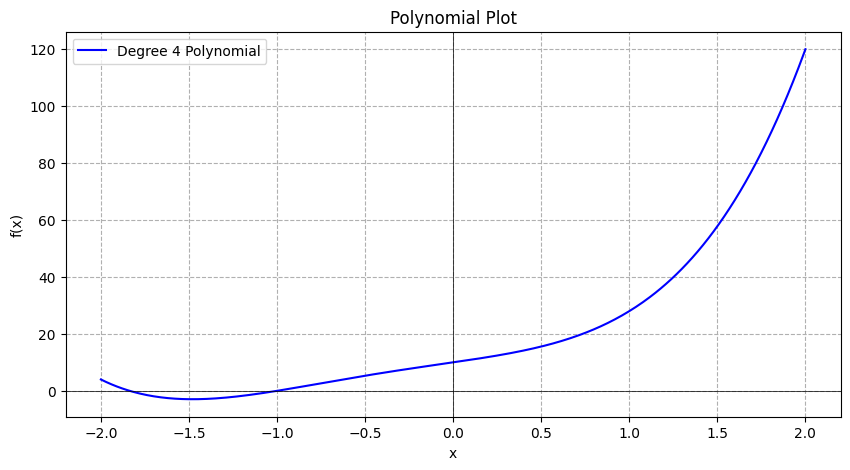

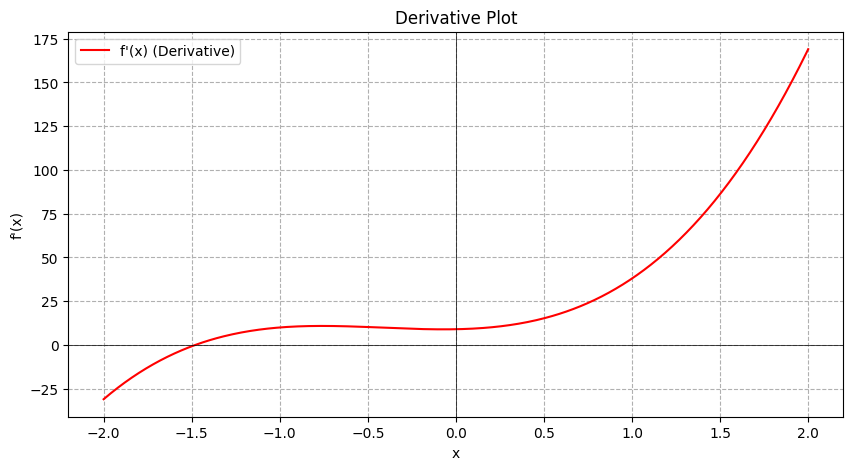

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, degree, coefficients):
        if not isinstance(degree, int) or degree < 0:
            raise ValueError("Degree must be a non-negative integer.")
        
        if len(coefficients) != degree + 1:
            raise ValueError(f"A polynomial of degree {degree} must have {degree + 1} coefficients.")
        
        self.degree = degree
        self.coefficients = [float(c) for c in coefficients]

    def evaluate(self, x):
        result = 0
        for i, coeff in enumerate(self.coefficients):
            power = self.degree - i
            result += coeff * (x ** power)
        return result

    def _get_derivative_coefficients(self):
        if self.degree == 0:
            return [0.0]
        
        deriv_coeffs = []
        for i in range(self.degree):
            # Power rule: d/dx (ax^n) = n*ax^(n-1)
            current_power = self.degree - i
            deriv_coeffs.append(self.coefficients[i] * current_power)
        return deriv_coeffs

    def derivative(self, x):
        deriv_coeffs = self._get_derivative_coefficients()
        new_degree = max(0, self.degree - 1)
        
        result = 0
        for i, coeff in enumerate(deriv_coeffs):
            power = new_degree - i
            result += coeff * (x ** power)
        return result

    def plot(self, x_range):
        x1, x2 = x_range
        x_vals = np.linspace(x1, x2, 400)
        y_vals = [self.evaluate(x) for x in x_vals]
        
        plt.figure(figsize=(10, 5))
        plt.plot(x_vals, y_vals, label=f'Degree {self.degree} Polynomial', color='blue')
        plt.title("Polynomial Plot")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--')
        plt.legend()
        plt.show()

    def plot_derivative(self, x_range):
        x1, x2 = x_range
        x_vals = np.linspace(x1, x2, 400)
        y_vals = [self.derivative(x) for x in x_vals]
        
        plt.figure(figsize=(10, 5))
        plt.plot(x_vals, y_vals, label="f'(x) (Derivative)", color='red')
        plt.title("Derivative Plot")
        plt.xlabel("x")
        plt.ylabel("f'(x)")
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--')
        plt.legend()
        plt.show()

poly1 = Polynomial(4, [3, 5, 1, 9, 10])
print(f"Value at x=1: {poly1.evaluate(1)}")
print(f"Derivative at x=1: {poly1.derivative(1)}")
poly1.plot([-2, 2])
poly1.plot_derivative([-2, 2])

## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [7]:
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

    def __str__(self):
        return f"{self.name}: ${self.price:.2f}"


class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, product):
        self.items.append(product)
        print(f"Added {product.name} to the cart.")

    def remove_item(self, product_name):
        found = False
        for item in self.items:
            if item.name == product_name:
                self.items.remove(item)
                print(f"Removed {product_name} from the cart.")
                found = True
                break  # Remove only the first instance found
        
        if not found:
            print(f"Error: {product_name} not found in cart.")

    def calculate_total(self):
        total = sum(item.price for item in self.items)
        return total

    def display_cart(self):
        if not self.items:
            print("The cart is empty.")
        else:
            print("--- Shopping Cart Items ---")
            for item in self.items:
                print(f"- {item}")
            print(f"Total: ${self.calculate_total():.2f}")


p1 = Product("Laptop", 1200.00)
p2 = Product("Mouse", 25.50)
p3 = Product("Keyboard", 45.00)


my_cart = ShoppingCart()

my_cart.add_item(p1)
my_cart.add_item(p2)
my_cart.add_item(p3)

print(f"Current Total: ${my_cart.calculate_total():.2f}")


my_cart.remove_item("Mouse")


my_cart.display_cart()

Added Laptop to the cart.
Added Mouse to the cart.
Added Keyboard to the cart.
Current Total: $1270.50
Removed Mouse from the cart.
--- Shopping Cart Items ---
- Laptop: $1200.00
- Keyboard: $45.00
Total: $1245.00
